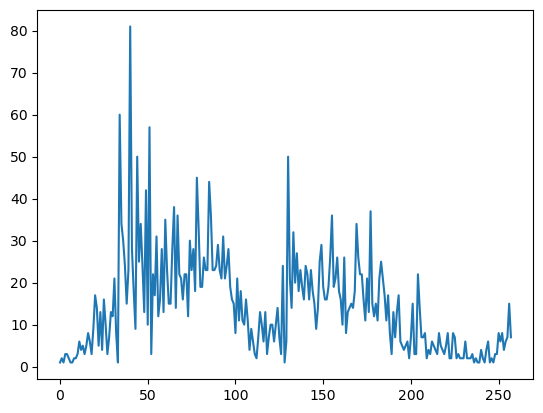

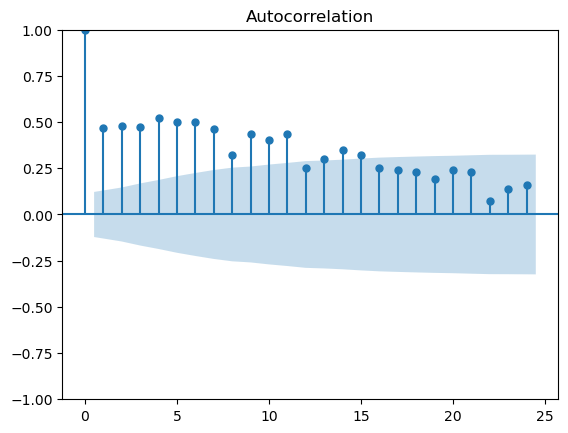

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


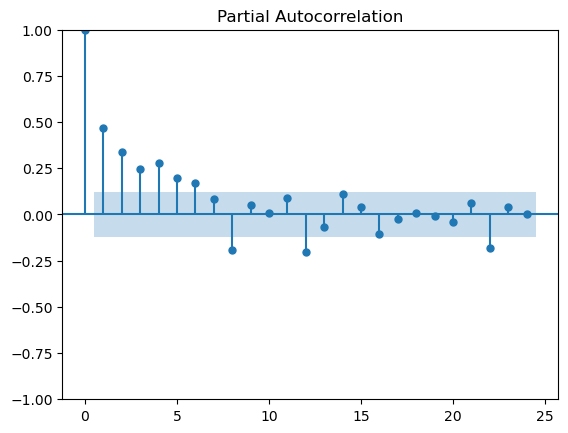

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\連江縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Lienchiang.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Lienchiang_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Lienchiang_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\連江縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        2
2        1
3        3
4        3
..     ...
254      6
255      7
256     15
257      7
258      6

[259 rows x 1 columns]
259


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
24/24 [==============================] - 5s 48ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/1000
24/24 [==============================] - 0s 20ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 3/1000
24/24 [==============================

24/24 [==============================] - 0s 6ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 57/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 58/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 59/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 60/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 61/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 62/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 63/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0205 -

24/24 [==============================] - 0s 9ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 118/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 119/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 120/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 121/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 122/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 123/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 124/1000
24/24 [==============================] - 0s 9ms/step - los

24/24 [==============================] - 0s 9ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 179/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 180/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 181/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 182/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 183/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 184/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 185/1000
24/24 [==============================] - 0s 9ms/step - loss:

24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 240/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 241/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 242/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 243/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0121 - val_mse: 0.0121
Epoch 244/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 245/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 246/1000
24/24 [==============================] - 0s 9ms/step - loss: 0

24/24 [==============================] - 0s 10ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 301/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 302/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 303/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 304/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 305/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 306/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 307/1000
24/24 [==============================] - 0s 8ms/step - loss:

24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 362/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 363/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 364/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 365/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 366/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 367/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 368/1000
24/24 [==============================] - 0s 9ms/step - loss

24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 423/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 424/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 425/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 426/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 427/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 428/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 429/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 484/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 485/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 486/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 487/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 488/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 489/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 490/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 545/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 546/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 547/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 548/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 549/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 550/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 551/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 606/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 607/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 608/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 609/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 610/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 611/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 612/1000
24/24 [==============================] - 0s 7ms/step - loss: 0

24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 667/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 668/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 669/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 670/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 671/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 672/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 673/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 728/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 729/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 730/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 731/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 732/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 733/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 734/1000
24/24 [==============================] - 0s 13ms/step -

Epoch 788/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 789/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 790/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 791/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 792/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 793/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 794/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 795/1000
24/24 [==============================] -

Epoch 849/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 850/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 851/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 852/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 853/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 854/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 855/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 856/1000
24/24 [==============================] -

Epoch 910/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 911/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 912/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 913/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 914/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 915/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 916/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 917/1000
24/24 [==============================] -

Epoch 971/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 972/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 973/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 974/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 975/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 976/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 977/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 978/1000
24/24 [==============================] -

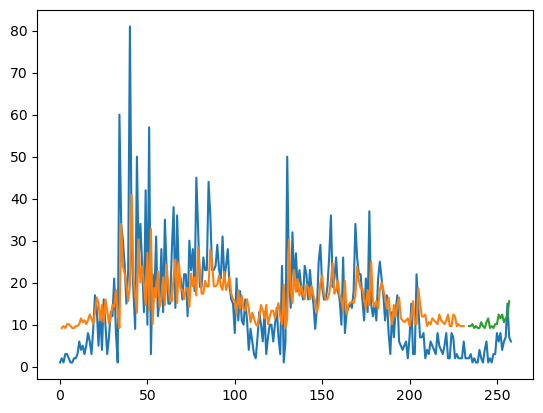

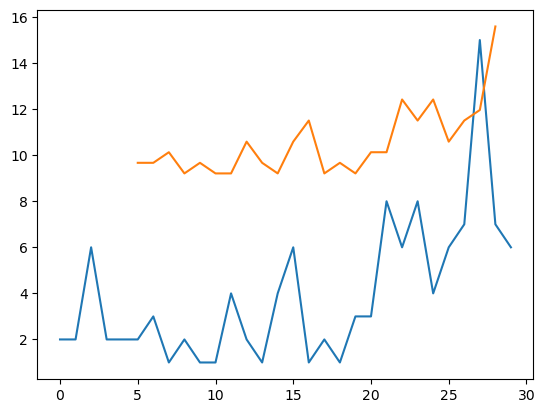

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_1000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_1000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_1000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_1000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
24/24 [==============================] - 7s 73ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 3/1000
24/24 [===========================

24/24 [==============================] - 0s 9ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 57/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 58/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 59/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 60/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 61/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 62/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 63/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0

24/24 [==============================] - 0s 21ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 118/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 119/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 120/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 121/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 122/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 123/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 124/1000
24/24 [==============================] - 0s 10ms/step - lo

Epoch 178/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 179/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 180/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 181/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 182/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 183/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 184/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 185/1000
24/24 [==============================] - 

Epoch 239/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 240/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 241/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 242/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 243/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 244/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 245/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 246/1000
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 301/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 302/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 303/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 304/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 305/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 306/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 307/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 362/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 363/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 364/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 365/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 366/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 367/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 368/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 423/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 424/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 425/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 426/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 427/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 428/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 429/1000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 484/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 485/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 486/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 487/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 488/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 489/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 490/1000
24/24 [==============================] - 0s 8ms/step - loss: 

24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 545/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 546/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 547/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 548/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 549/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 550/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 551/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 606/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 607/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 608/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 609/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 610/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 611/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 612/1000
24/24 [==============================] - 0s 13ms/step - loss: 

Epoch 666/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 667/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 668/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 669/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 670/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 671/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 672/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 673/1000
24/24 [==============================] -

Epoch 727/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 728/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 729/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 730/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 731/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 732/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 733/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 734/1000
24/24 [==============================] - 0s 8ms

Epoch 788/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 789/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 790/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 791/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 792/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 793/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 794/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 795/1000
24/24 [==============================] -

Epoch 849/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 850/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 851/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 852/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 853/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 854/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 855/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 856/1000
24/24 [==============================] - 0s 8m

24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 911/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 912/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 913/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 914/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 915/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 916/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 917/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 972/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 973/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 974/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 975/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 976/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 977/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 978/1000
24/24 [==============================] - 0s 8ms/step - loss: 0

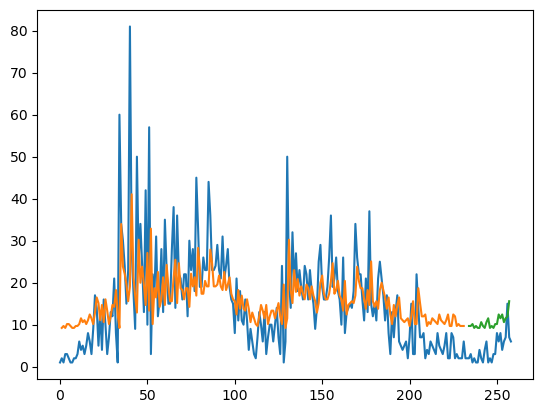

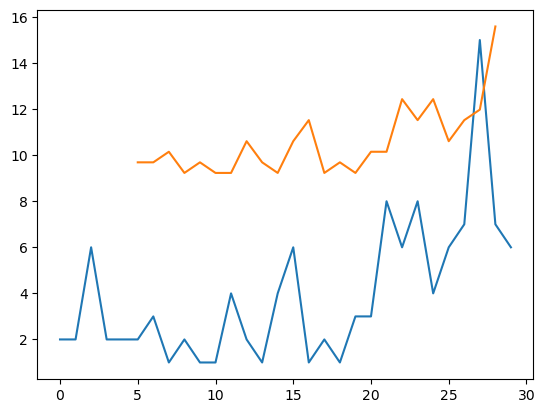

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_1000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_1000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_1000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_1000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

24/24 [==============================] - 0s 15ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 54/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 55/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 56/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0096 - val_mse: 0.0096
Epoch 57/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 58/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 59/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 60/1000
24/24 [==============================] - 0s 13ms/step - loss: 

24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 115/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 116/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 117/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 118/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 119/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 120/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 121/1000
24/24 [==============================] - 0s 13ms/step -

Epoch 175/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 176/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 177/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 178/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 179/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 180/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 181/1000
24/24 [==============================] - 1s 23ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 182/1000
24/24 [==============================] -

Epoch 236/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 237/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 238/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 239/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 240/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 241/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 242/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 243/1000
24/24 [==============================] -

Epoch 297/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 298/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 299/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 300/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 301/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 302/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 303/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 304/1000
24/24 [==============================] -

Epoch 358/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 359/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 360/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 361/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 362/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 363/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 364/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 365/1000
24/24 [==============================] -

Epoch 419/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 420/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 421/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 422/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 423/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 424/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 425/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 426/1000
24/24 [==============================] - 0s 9m

Epoch 480/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 481/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 482/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 483/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 484/1000
24/24 [==============================] - 0s 17ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 485/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 486/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 487/1000
24/24 [==============================] -

Epoch 541/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 542/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 543/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 544/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 545/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 546/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 547/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 548/1000
24/24 [==============================] -

Epoch 602/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 603/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 604/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 605/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 606/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 607/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 608/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 609/1000
24/24 [==============================] -

Epoch 663/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 664/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 665/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 666/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 667/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 668/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 669/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 670/1000
24/24 [==============================] -

Epoch 724/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 725/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 726/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 727/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 728/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 729/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 730/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 731/1000
24/24 [==============================] -

Epoch 785/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 786/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 787/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 788/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 789/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 790/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 791/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 792/1000
24/24 [==============================] -

Epoch 846/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 847/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 848/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 849/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 850/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 851/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 852/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 853/1000
24/24 [==============================] - 0s 

Epoch 907/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 908/1000
24/24 [==============================] - 0s 11ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 909/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 910/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 911/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 912/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 913/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 914/1000
24/24 [==============================] -

Epoch 968/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 969/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 970/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 971/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 972/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 973/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 974/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 975/1000
24/24 [==============================] - 0s 

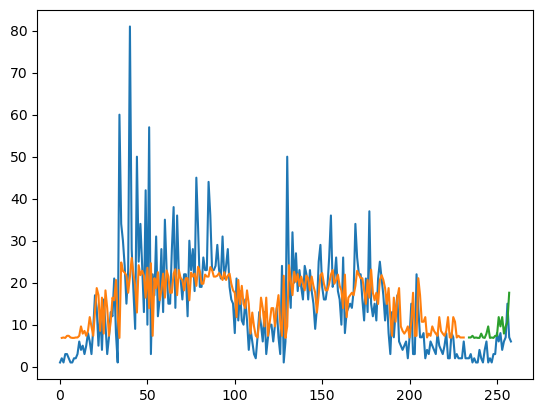

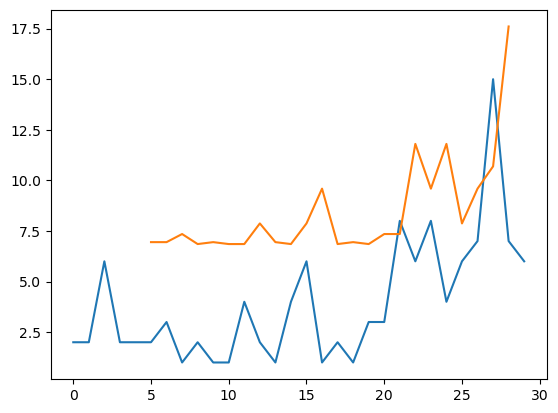

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_1000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_1000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_1000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_1000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/1000
231/231 [==============================] - 2s 10ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 52/1000
231/231 [==============================] - 2s 10ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 53/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 54/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 55/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 56/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 57/1000
231/231 [==============================] - 2s 10ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 58/1000
231/231 [=============================

231/231 [==============================] - 2s 7ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 112/1000
231/231 [==============================] - 3s 11ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 113/1000
231/231 [==============================] - 2s 7ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 114/1000
231/231 [==============================] - 2s 7ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 115/1000
231/231 [==============================] - 2s 7ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 116/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 117/1000
231/231 [==============================] - 2s 7ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 118/1000
231/231 [==============================] - 2s 7

231/231 [==============================] - 1s 6ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 172/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 173/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 174/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0225 - val_mse: 0.0225
Epoch 175/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 176/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 177/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0206 - val_mse: 0.0206
Epoch 178/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 232/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 233/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0283 - val_mse: 0.0283
Epoch 234/1000
231/231 [==============================] - 2s 7ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 235/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0264 - val_mse: 0.0264
Epoch 236/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 237/1000
231/231 [==============================] - 1s 6ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 238/1000
231/231 [==============================] - 2s 8m

231/231 [==============================] - 2s 9ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 292/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 293/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0194 - val_mse: 0.0194
Epoch 294/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 295/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 296/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 297/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 298/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0180 - val_mse: 0.0180
Epoch 352/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 353/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 354/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 355/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 356/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0229 - val_mse: 0.0229
Epoch 357/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 358/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 412/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 413/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 414/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 415/1000
231/231 [==============================] - 3s 11ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 416/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 417/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 418/1000
231/231 [==============================] - 2s 9

231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 472/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 473/1000
231/231 [==============================] - 2s 10ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 474/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 475/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 476/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 477/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 478/1000
231/231 [==============================] - 2s 9

231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 532/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 533/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 534/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 535/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 536/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 537/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 538/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 592/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 593/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 594/1000
231/231 [==============================] - 2s 8ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 595/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 596/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 597/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 598/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 652/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 653/1000
231/231 [==============================] - 2s 8ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 654/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 655/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 656/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 657/1000
231/231 [==============================] - 2s 8ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 658/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 712/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 713/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 714/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 715/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 716/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 717/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 718/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0052 - val_mse: 0.0052
Epoch 772/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 773/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 774/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 775/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 776/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 777/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 778/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 832/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 833/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 834/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 835/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 836/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 837/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 838/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 8ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 892/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 893/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 894/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 895/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 896/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 897/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 898/1000
231/231 [==============================] - 2s 9m

231/231 [==============================] - 2s 9ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 952/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 953/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 954/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 955/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 956/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 957/1000
231/231 [==============================] - 2s 9ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 958/1000
231/231 [==============================] - 2s 9m

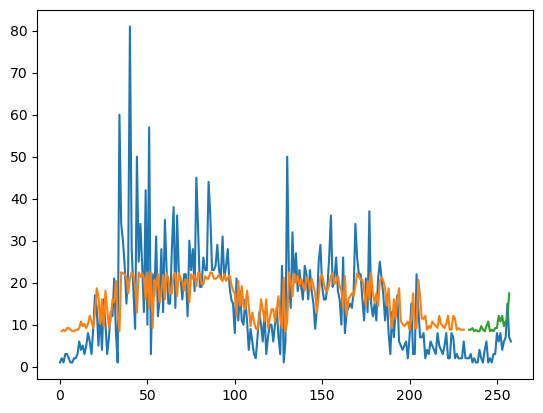

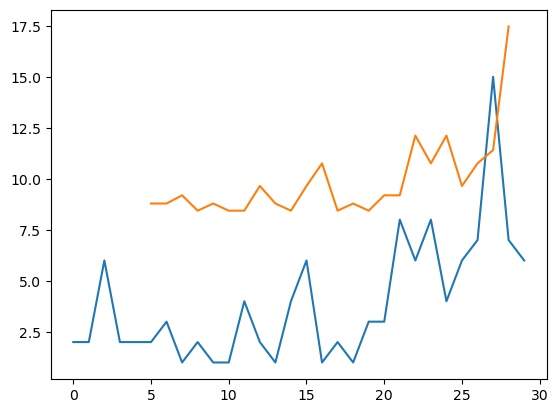

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="lienchiang_rnn+lstm_1000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=1000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('lienchiang_rnn+lstm_1000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lienchiang_rnn+lstm_1000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("lienchiang_rnn+lstm_1000_predict&real_4.png")
plt.show()